In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0,0.0,16.3,31.6,16.0,low_bike_demand
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0,0.0,23.9,85.7,16.0,low_bike_demand
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0,0.0,0.0,81.1,16.0,low_bike_demand
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0,0.0,19.2,0.0,16.0,low_bike_demand
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0,0.0,10.5,44.6,16.0,low_bike_demand


In [5]:
mapping = {'high_bike_demand': 1, 'low_bike_demand': 0}
df['increase_stock'] = df['increase_stock'].map(mapping)

In [6]:
print(df['increase_stock'].unique())

[0 1]


In [7]:
bins = [0, 6, 12, 18, 24]
labels = ['0-6', '6-12', '12-18', '18-24']
df['hour_bin'] = pd.cut(df['hour_of_day'], bins=bins, labels=labels, right=False, include_lowest=True)

print(df[['hour_of_day', 'hour_bin']].head())

   hour_of_day hour_bin
0            5      0-6
1           21    18-24
2           21    18-24
3            1      0-6
4           17    12-18


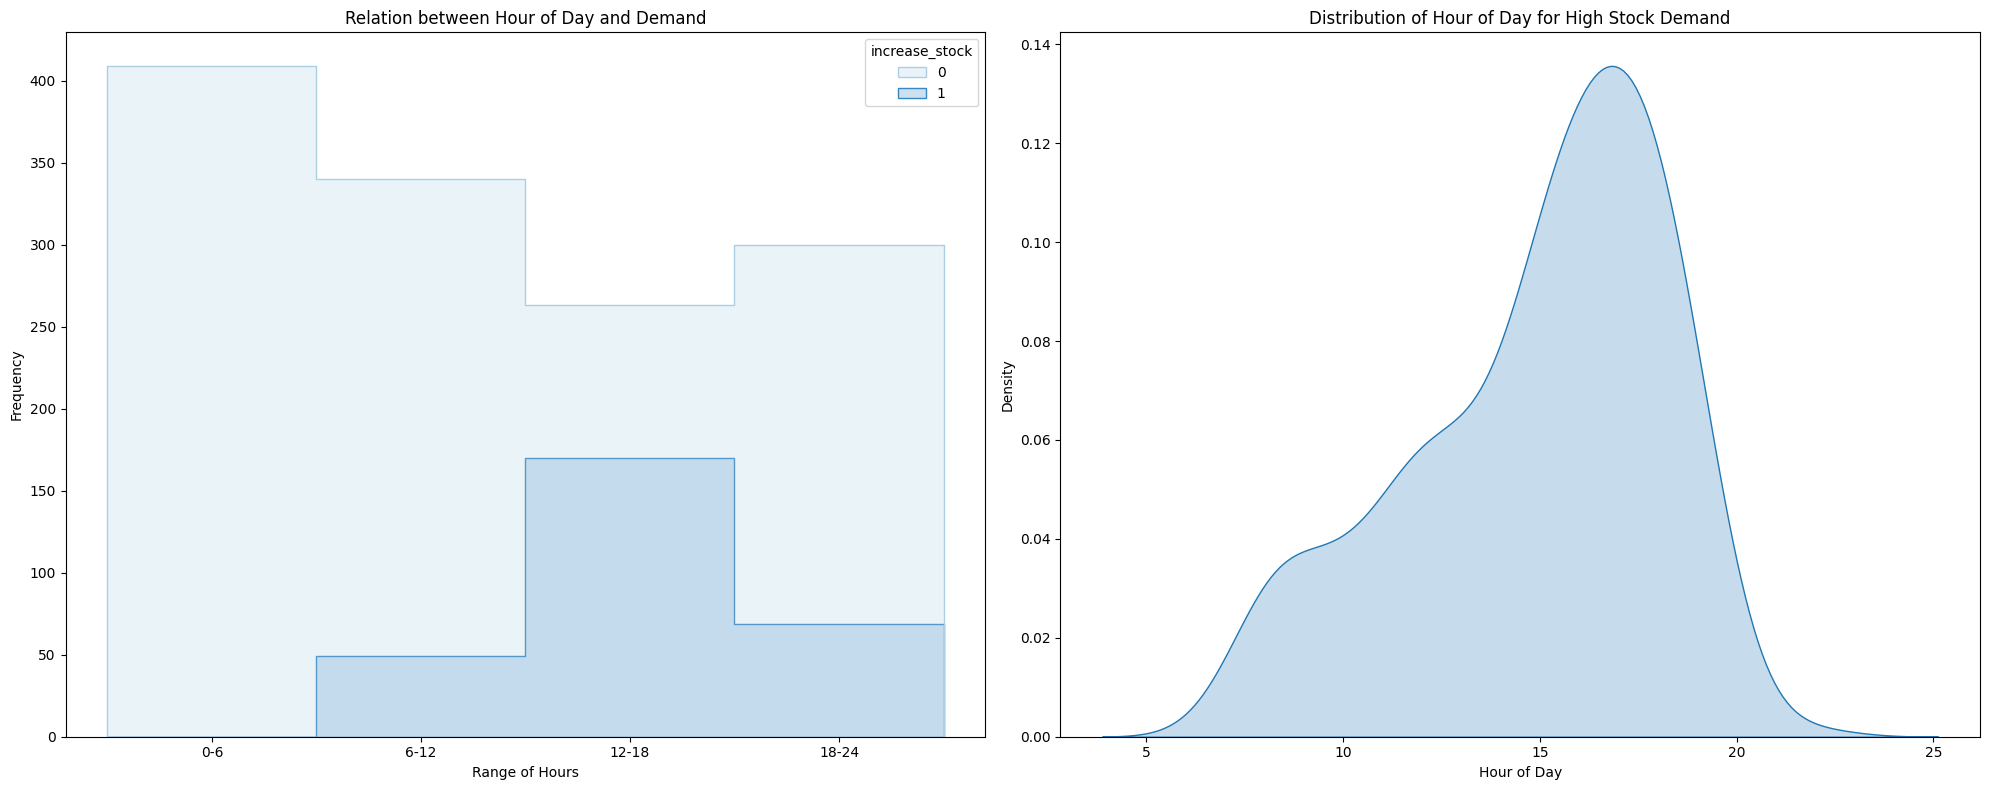

In [130]:
# Show relation between 'increase_stock' and 'hour_of_day'
df_high = df[df['increase_stock'] == 1]
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.histplot(data=df, x='hour_bin', palette="Blues", hue='increase_stock', element="step", ax=axes[0])
axes[0].set_title('Relation between Hour of Day and Demand')
axes[0].set_xlabel('Range of Hours')
axes[0].set_ylabel('Frequency')

sns.kdeplot(data=df_high, x="hour_of_day", fill=True, ax=axes[1])
axes[1].set_title('Distribution of Hour of Day for High Stock Demand')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

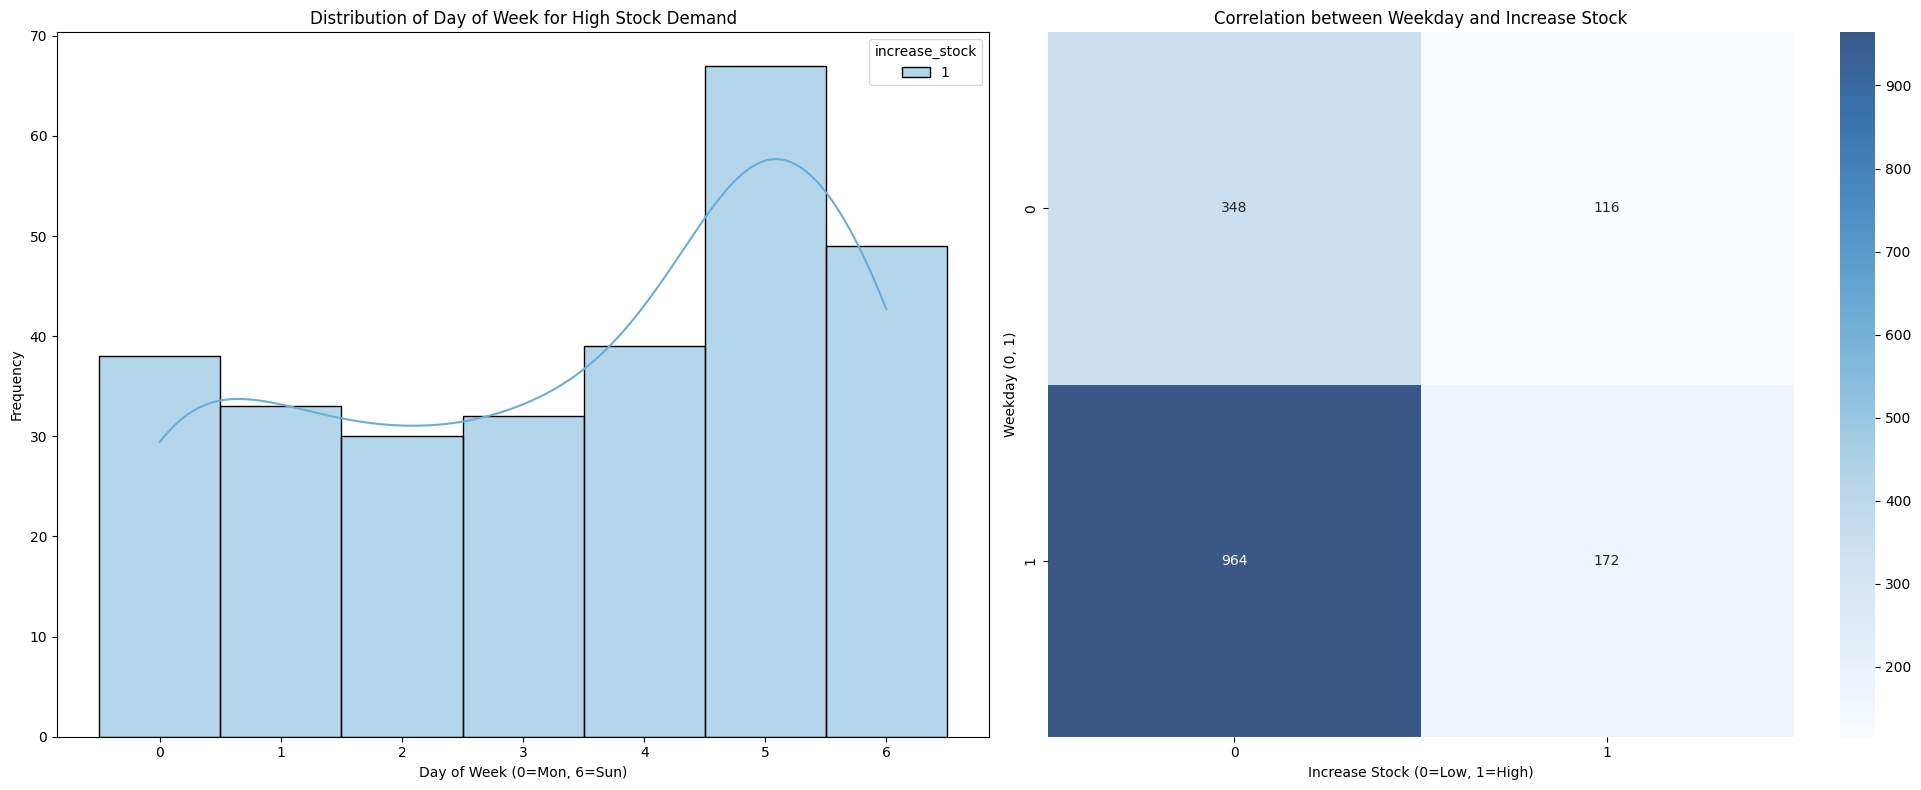

In [83]:
# Plot distribution of High Stock Demand for Week related features
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Day of Week vs High Stock Demand
sns.histplot(data=df_high, x='day_of_week', bins=7, palette='Blues', hue='increase_stock', discrete=True, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Day of Week for High Stock Demand')
axes[0].set_xlabel('Day of Week (0=Mon, 6=Sun)')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(range(7))

# Correlation between 'weekday' and 'increase_stock'
ct = pd.crosstab(df['weekday'], df['increase_stock'])

sns.heatmap(ct, annot=True, fmt='d', cmap='Blues', alpha=0.8, ax=axes[1])
axes[1].set_title('Correlation between Weekday and Increase Stock')
axes[1].set_xlabel('Increase Stock (0=Low, 1=High)')
axes[1].set_ylabel('Weekday (0, 1)')

plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

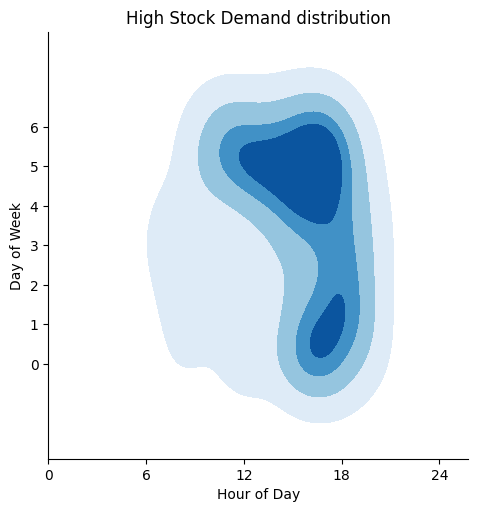

In [72]:
# High Stock Demand distribution
plt.figure(figsize=(10, 8))

df_high = df[df['increase_stock'] == 1]

# Contours (KDE)
sns.displot(data=df_high, x='hour_of_day', y='day_of_week', cmap='Blues', kind='kde', levels=5, fill=True)

plt.title('High Stock Demand distribution')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.xticks([0, 6, 12, 18, 24])
plt.yticks([0, 1, 2, 3, 4, 5, 6])
plt.show()

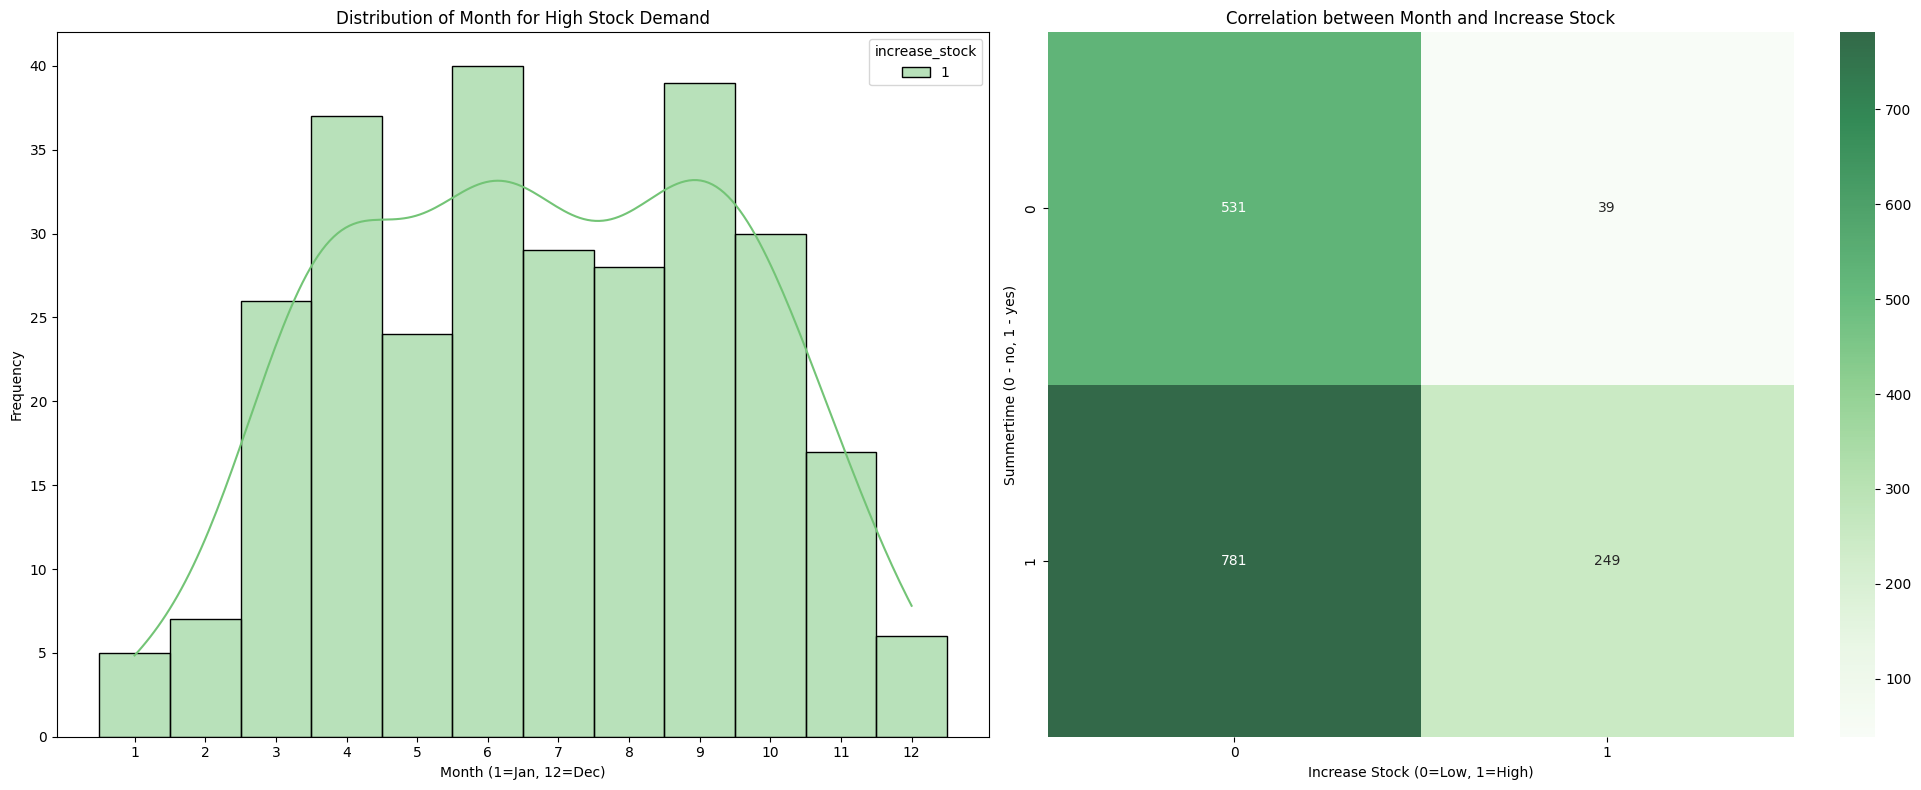

In [ ]:
# Plot distribution of High Stock Demand for Month related features
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Day of Week vs High Stock Demand
sns.histplot(data=df_high, x='month', bins=12, palette='Greens', hue='increase_stock', discrete=True, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Month for High Stock Demand')
axes[0].set_xlabel('Month (1=Jan, 12=Dec)')
axes[0].set_ylabel('Frequency')
axes[0].set_xticks(range(1, 13))

# Correlation between 'summertime' and 'increase_stock'
ct = pd.crosstab(df['summertime'], df['increase_stock'])

sns.heatmap(ct, annot=True, fmt='d', cmap='Greens', alpha=0.8, ax=axes[1])
axes[1].set_title('Correlation between Month and Increase Stock')
axes[1].set_xlabel('Increase Stock (0=Low, 1=High)')
axes[1].set_ylabel('Summertime (0 - no, 1 - yes)')

plt.tight_layout()
plt.show()


In [ ]:
print(df['snow'].unique()) # Redundant

[0]


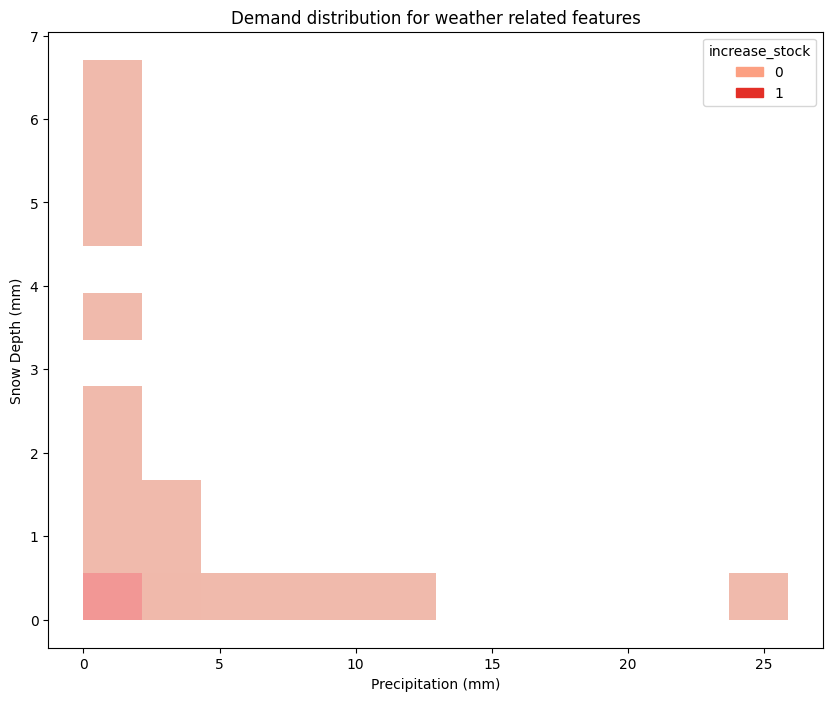

In [120]:
# Plot distribution of High Stock Demand for Weather related features
plt.figure(figsize=(10, 8))

sns.histplot(df, x="precip", y="snowdepth", palette="Reds", hue="increase_stock")
plt.title('Demand distribution for weather related features')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Snow Depth (mm)')

plt.show()


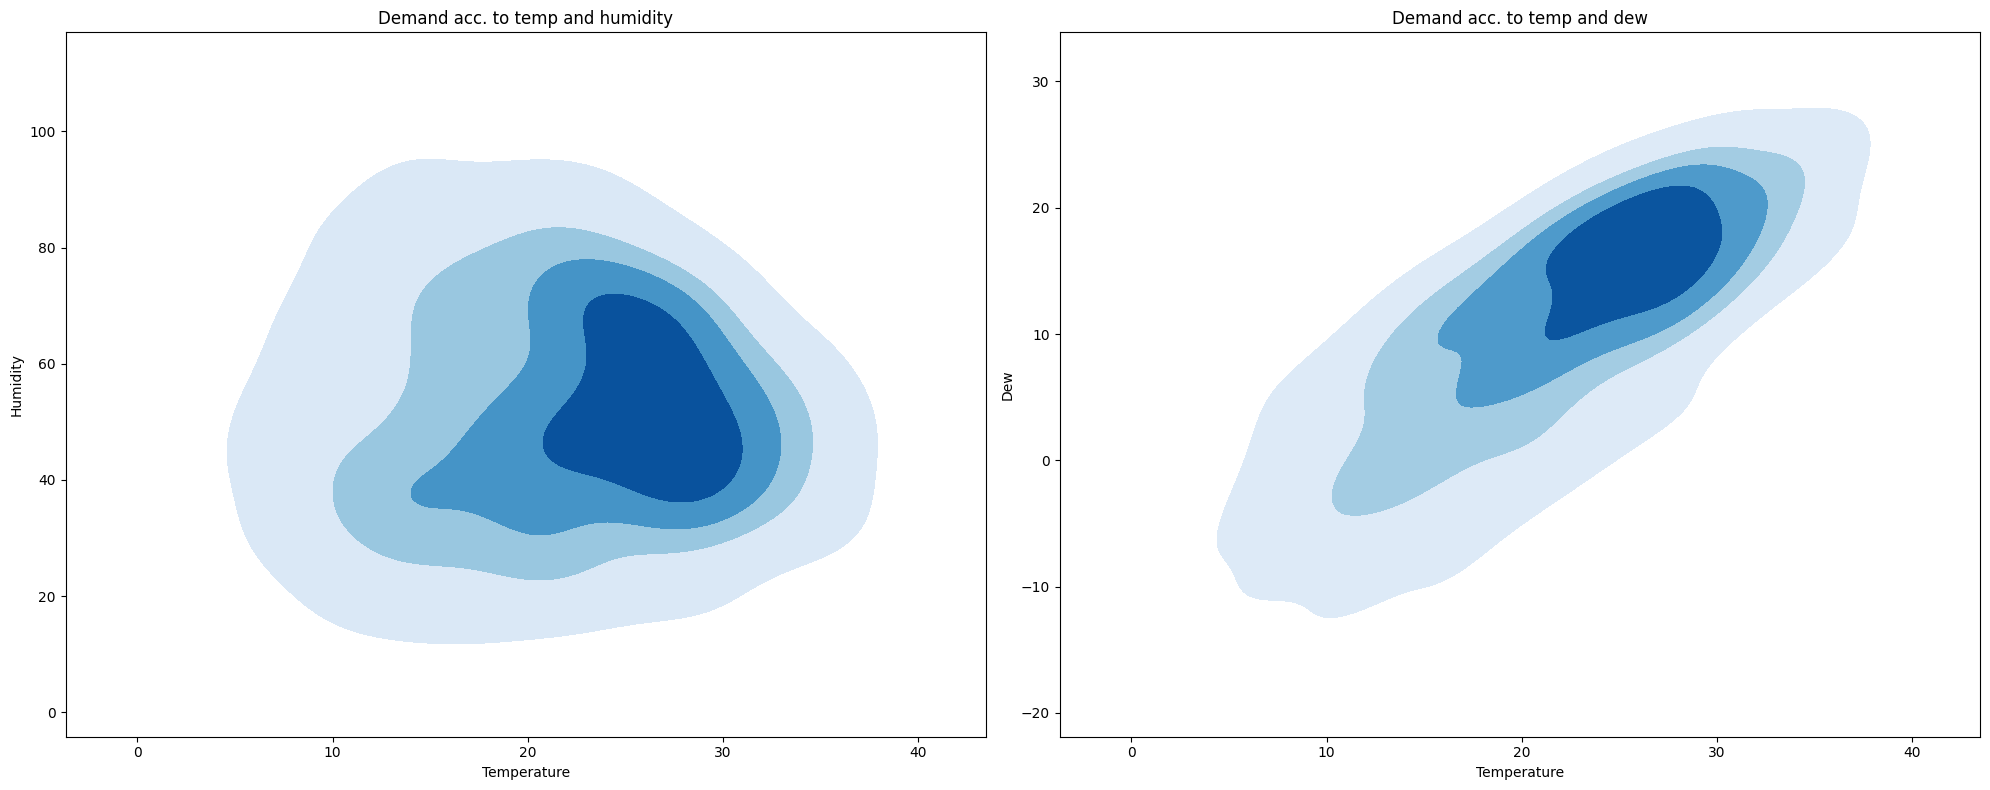

In [ ]:
# Plot for temp, humidity and dew related features
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.kdeplot(data=df_high, x='temp', y='humidity', cmap='Blues', levels=5, fill=True, ax=axes[0])
axes[0].set_title('Demand acc. to temp and humidity')
axes[0].set_xlabel('Temperature')
axes[0].set_ylabel('Humidity')

sns.kdeplot(data=df_high, x='temp', y='dew', cmap='Blues', levels=5, fill=True, ax=axes[1])
axes[1].set_title('Demand acc. to temp and dew')
axes[1].set_xlabel('Temperature')
axes[1].set_ylabel('Dew')

plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

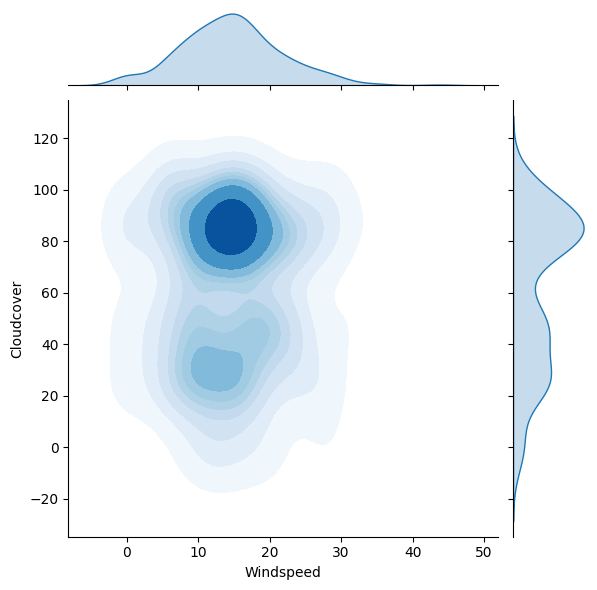

In [148]:
# Plot distribution for wind and cloud related features
plt.figure(figsize=(10, 8))

sns.jointplot(data=df_high, x="windspeed", y="cloudcover", kind="kde", cmap="Blues", fill=True)
plt.xlabel('Windspeed')
plt.ylabel('Cloudcover')

plt.show()